In [45]:
import torch
import torchvision
from torchvision import transforms,datasets
import pandas as pd

In [46]:
train=datasets.FashionMNIST("",download=True,train=True,transform=transforms.Compose([transforms.ToTensor()]))
test=datasets.FashionMNIST("",download=True,train=False,transform=transforms.Compose([transforms.ToTensor()]))
df=pd.read_csv('fashion-mnist_test.csv')
df=df.to_numpy()
df=torch.from_numpy(df)
train = torch.utils.data.ConcatDataset((train, test))


In [47]:
trainset=torch.utils.data.DataLoader(train,batch_size=64,shuffle=True)
testset=torch.utils.data.DataLoader(test,batch_size=64,shuffle=True)


In [48]:
import torch.nn as nn
import torch.nn.functional as F

In [49]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1=nn.Linear(28*28,100)
        self.fc2=nn.Linear(100,100)
        self.fc3=nn.Linear(100,100)
        self.fc4=nn.Linear(100,10)
    def forward(self,x):
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=F.relu(self.fc3(x))
        x=self.fc4(x)
        #return F.softmax(x,dim=1)
        return x
        

net=Net()
print(net)
X=torch.randn((28,28))  

Net(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=100, bias=True)
  (fc4): Linear(in_features=100, out_features=10, bias=True)
)


In [50]:

X=X.view(-1,28*28)
output=net.forward(X)
output

tensor([[-0.0550,  0.1086, -0.0495,  0.0512,  0.0259, -0.1411,  0.0174,  0.1258,
          0.1257, -0.0666]], grad_fn=<AddmmBackward>)

In [52]:
import torch.optim as optim
optimizer=optim.Adam(net.parameters(),lr=1e-2)

EPOCHS=9
for epoch in range(EPOCHS):
    for data in trainset:
        X,y=data
        net.zero_grad()
        output=net(X.view(-1,28*28))
        loss=F.cross_entropy(output,y)
        loss.backward()
        optimizer.step()
    print(loss)
        

tensor(0.6617, grad_fn=<NllLossBackward>)
tensor(0.7138, grad_fn=<NllLossBackward>)
tensor(0.3004, grad_fn=<NllLossBackward>)
tensor(0.2129, grad_fn=<NllLossBackward>)
tensor(0.2843, grad_fn=<NllLossBackward>)
tensor(0.3535, grad_fn=<NllLossBackward>)
tensor(0.4805, grad_fn=<NllLossBackward>)
tensor(0.3976, grad_fn=<NllLossBackward>)
tensor(0.4734, grad_fn=<NllLossBackward>)


In [54]:
correct=0
total=0
with torch.no_grad():
    for data in trainset:
        X,y=data
        output=net(X.view(-1,28*28))
        for idx,i in enumerate(output):
            if torch.argmax(i)==y[idx]:
                correct+=1
            total+=1
print("Accuracy",correct/total)
for data in testset:
        X,y=data
        output=net(X.view(-1,28*28))
        print(output.shape)
        break

Accuracy 0.8634285714285714
torch.Size([64, 10])


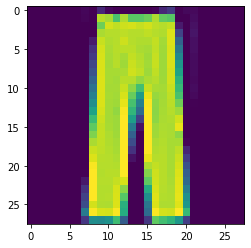

In [55]:
import matplotlib.pyplot as plt
for data in testset:
    X,y=data
    break
plt.imshow(X[0].view(28,28))

In [56]:
torch.argmax(net(X[0].view(-1,784)))

tensor(1, grad_fn=<NotImplemented>)

In [57]:
df=df.float()
#df.shape
output=net(df)
torch.argmax(output[100])

tensor(9, grad_fn=<NotImplemented>)

In [58]:
res = []
for i in range(1,10001):
    res.append([i,int(torch.argmax(output[i-1]))])
res = pd.DataFrame(res, columns = ['id', 'label']) 
res.to_csv('fin.csv', index = False)